In [1]:
# Is the recipe of columns in Data significantly different

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.cluster.hierarchy as sch

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/aceassess/palm_ffb.csv
/kaggle/input/aceassess/ingredient.csv


In [2]:
#Prepare Data
Data = pd.read_csv('../input/aceassess/ingredient.csv')

In [3]:
#Descriptive Analysis by additive/ingredient

#Basic Statistics
#We start the analysis with some basic statistics to get a feel for the data
#The coefficient of variance provides a good indication of how much the formulation varies
#within each ingredient. Here we see that the standard deviation of ingredient F, H and I
#is larger than the mean.
BasicStats=pd.concat([Data.max(),Data.mean(),Data.median(),Data.std(),Data.std()/Data.mean()],axis=1)
BasicStats.columns = ['Max','Mean','Median','Std',"CV"]
print(BasicStats)

#ANOVA
#To see if any of the formulations vary significantly, we treat each additive as a group
#The one way anova gives a large F-score indicating variance between groups are much larger 
#than the variance within a group
#However this may appear to be misleading due to the large difference between the 
#ingredient magnitude as supported by the small p value
print("ANOVA")
stats.f_oneway(Data.iloc[:,0],Data.iloc[:,1], Data.iloc[:,2], Data.iloc[:,3], Data.iloc[:,4], Data.iloc[:,5],Data.iloc[:,6],Data.iloc[:,7],Data.iloc[:,8])



        Max       Mean    Median       Std        CV
a   1.53393   1.518365   1.51768  0.003037  0.002000
b  17.38000  13.407850  13.30000  0.816604  0.060905
c   4.49000   2.684533   3.48000  1.442408  0.537303
d   3.50000   1.444907   1.36000  0.499270  0.345538
e  75.41000  72.650935  72.79000  0.774546  0.010661
f   6.21000   0.497056   0.55500  0.652192  1.312109
g  16.19000   8.956963   8.60000  1.423153  0.158888
h   3.15000   0.175047   0.00000  0.497219  2.840494
i   0.51000   0.057009   0.00000  0.097439  1.709171
ANOVA


F_onewayResult(statistic=168331.96885835085, pvalue=0.0)

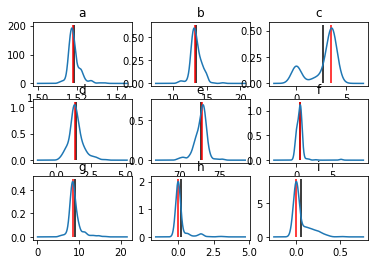

In [4]:
#We can use a probability density plot to visualise how the intra-ingredient distribution looks like
#One clear observation is there are two distinct groups of formulation of additive c
#Additive F,G ,H are largely similar in most formulations bar outliers
#Additive I has a distinct peak but tweaks at a larger and larger dose are available

for i in range(Data.shape[1]):
    plt.subplot( math.ceil(math.sqrt(Data.shape[1])), math.ceil(math.sqrt(Data.shape[1])),i+1)
    CurDat=Data.iloc[:,i]
    CurDat.plot(kind="density")
    axes = plt.gca()
    y_min, y_max = axes.get_ylim()
    plt.vlines(CurDat.mean(),ymin=0,ymax=y_max,color="black")
    plt.vlines(CurDat.median(),ymin=0,ymax=y_max,color="red")
    plt.title(Data.columns[i])
    plt.ylabel("")
plt.show()

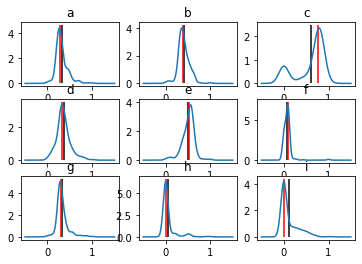

ANOVA Normalised
F_onewayResult(statistic=259.2815123863136, pvalue=1.1169106591218006e-298)


In [5]:
#Scale the ingredients to a fixed 0-1 spectrum we can still see that the inter ingredient
#variance dominates over the intra ingredient variance
for i in range(Data.shape[1]):
    CurDat=Data.iloc[:,i]
    CurDat=(CurDat-CurDat.min())/(CurDat.max()-CurDat.min())
    #CurDat=(CurDat/CurDat.mean()) #normalise by mean defeats the purpose of anova
    if i == 0:
        Data_Norm=CurDat
    else:
        Data_Norm=pd.concat([Data_Norm,CurDat],axis=1)
    plt.subplot( math.ceil(math.sqrt(Data.shape[1])), math.ceil(math.sqrt(Data.shape[1])),i+1)
    CurDat.plot(kind="density")
    axes = plt.gca()
    y_min, y_max = axes.get_ylim()
    plt.vlines(CurDat.mean(),ymin=0,ymax=y_max,color="black")
    plt.vlines(CurDat.median(),ymin=0,ymax=y_max,color="red")
    plt.title(Data.columns[i])
    plt.ylabel("")
plt.show()    
print("ANOVA Normalised")
print(stats.f_oneway(Data_Norm.iloc[:,0],Data_Norm.iloc[:,1], Data_Norm.iloc[:,2], Data_Norm.iloc[:,3], Data_Norm.iloc[:,4], Data_Norm.iloc[:,5],Data_Norm.iloc[:,6],Data_Norm.iloc[:,7],Data_Norm.iloc[:,8]))



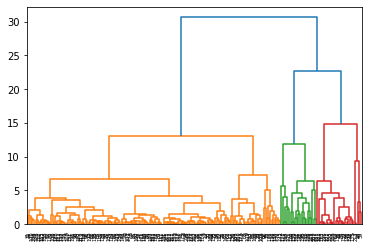

In [6]:
#As a final analysis, agglomerative clustering is applied to identify distinct formulations.
#agglomerative clustering  is selected as it proposes the number of clusters 
#which is a proxy for distinct formulation based on a linkage method
#The dendogram shows 3 distinct groups of formulation with 1 large group that has many variations


dendrogram = sch.dendrogram(sch.linkage(Data, method = 'ward'))